## Visualization

## 1. Online_Retail(따라하기) 

In [1]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Step 2. Import the dataset from this address.
### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set encoding = 'latin1' in pd.read_csv().

In [2]:
online_rt = pd.read_csv('Online_Retail.csv', encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
online_rt.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [12]:
except_sum=online_rt[online_rt.Country!='United Kingdom'].groupby('Country').sum()

In [14]:
except_sum.sort_values('Quantity', ascending=False).head(10)

,Quantity,UnitPrice,CustomerID
Country,,,
Netherlands,200128,6492.55,34190538.0
EIRE,142637,48447.19,110391745.0
Germany,117448,37666.00,120075093.0
France,110480,43031.99,107648864.0
Australia,83653,4054.75,15693002.0
Sweden,35637,1806.83,6790083.0
Switzerland,30325,6813.69,23775916.0
Spain,26824,12633.45,32689291.0
Japan,25218,814.86,4567292.0


In [15]:
# group by the Country
countries = online_rt.groupby('Country').sum()

# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

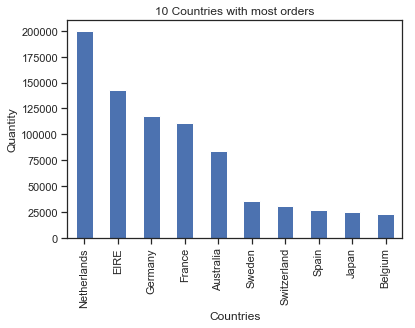

In [18]:
# create the plot
countries['Quantity'].plot(kind='bar')

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

In [20]:
countries.sort_values(by = 'Quantity',ascending = False)[1:11]

,Quantity,UnitPrice,CustomerID
Country,,,
EIRE,142637,48447.19,110391745.0
Germany,117448,37666.00,120075093.0
France,110480,43031.99,107648864.0
Australia,83653,4054.75,15693002.0
Sweden,35637,1806.83,6790083.0
Switzerland,30325,6813.69,23775916.0
Spain,26824,12633.45,32689291.0
Japan,25218,814.86,4567292.0
Belgium,23152,7540.13,25718288.0


### Step 5. Exclude negative Quantity entries

In [21]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [22]:
customers = online_rt.groupby(['CustomerID','Country']).sum()

In [24]:
customers.head(10)

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30
12352.0,Norway,536,1354.11
12353.0,Bahrain,20,24.30
12354.0,Spain,530,261.22
12355.0,Bahrain,240,54.65


In [25]:
# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

In [26]:
customers.index.get_level_values(1)

Index(['United Kingdom', 'Iceland', 'Finland', 'Italy', 'Norway', 'Norway',
       'Bahrain', 'Spain', 'Bahrain', 'Portugal',
       ...
       'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom',
       'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom',
       'United Kingdom', 'United Kingdom'],
      dtype='object', name='Country', length=4346)

In [32]:
customers.index.get_level_values(1) # 롸?
# 아 인덱스가 두개구나

#Return an Index of values for requested level.

# This is primarily useful to get an individual level of values from a MultiIndex, but is provided on Index as well for compatibility.

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_level_values.html

Index(['United Kingdom', 'Iceland', 'Finland', 'Italy', 'Norway', 'Norway',
       'Bahrain', 'Spain', 'Bahrain', 'Portugal',
       ...
       'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom',
       'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom',
       'United Kingdom', 'United Kingdom'],
      dtype='object', name='Country', length=4346)

In [27]:
# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

C:\Users\dbdms\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

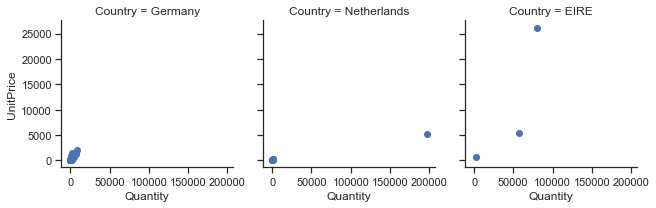

In [34]:
# Graph Section #

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

### Step 7. Investigate why the previous results look so uninformative.

#### This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

#### (But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
#### Step 7.1.1 Display the first few rows of that DataFrame.

In [36]:
#This takes our initial dataframe groups it primarily by 'CustomerID' and secondarily by 'Country'.
#It sums all the (non-indexical) columns that have numerical values under each group.
customers = online_rt.groupby(['CustomerID','Country']).sum().head()

#Here's what it looks like:
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


#### Step 7.1.2 Think about what that piece of code does and display the dtype of UnitPrice

In [39]:
customers.UnitPrice.dtype

dtype('float64')

In [ ]:
#So it's 'float64'
#But why did we sum 'UnitPrice', to begin with?
#If 'UnitPrice' wasn't something that we were interested in then it would be OK
#since we wouldn't care whether UnitPrice was being summed or not.
#But we want our graphs to reflect 'UnitPrice'!
#Note that summing up 'UnitPrice' can be highly misleading.
#It doesn't tell us much as to what the customer is doing.

#Suppose, a customer places one order of 1000 items that are worth $1 each.
#Another customer places a thousand orders of 1 item worth $1.
#There isn't much of a difference between what the former and the latter customers did.
#After all, they've spent the same amount of money.
#so we should be careful when we're summing columns. Sometimes we intend to sum just one column
#('Quantity' in this case) and another column like UnitPrice gets ito the mix.

#### Step 7.1.3 Pull data from online_rt for CustomerIDs 12346.0 and 12347.0.

In [40]:
display(online_rt[online_rt.CustomerID == 12347.0].
        sort_values(by='UnitPrice', ascending = False).head())
display(online_rt[online_rt.CustomerID == 12346.0].
        sort_values(by='UnitPrice', ascending = False).head())
#The result is exactly what we'd suspected. Customer 12346.0 placed
#one giant order, whereas 12347.0 placed a lot of smaller orders.
#So we've identified one potential reason why our plots looked so weird at section 6.
#At this stage we need to go back to the initial problem we've specified at section 6.
#And make it more precise.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom



#### Step 7.2 Reinterpreting the initial problem.
To reiterate the question that we were dealing with:
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations. We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries. Or we could do one plot per country. To keep things consistent with the rest of the exercise, let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves: Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue). This exercise goes for sales volume, so let's stick to that.

#### Step 7.2.1 Find out the top 3 countries in terms of sales volume

In [41]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

#### Step 7.2.2
Now that we have the top 3 countries, we can focus on the rest of the problem:
"Quantity per UnitPrice by CustomerID".
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:
One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total Quantity for each customer. The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
#### Step 7.3.1 Add a column to online_rt called Revenue calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [42]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


#### Step 7.3.2 Group by CustomerID and Country and find out the average price (AvgPrice) each customer spends per unit.

In [43]:
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

C:\Users\dbdms\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


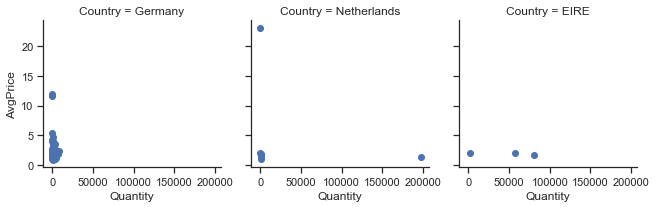

In [44]:
# Step 7.3.3 Plot

# Graph Section v 2#

# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair! There are two things to realize: 1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend. 2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of Country and hopefully see a less scattered graph.

#### Step 7.4.1 Plot the data for each CustomerID on a single graph

C:\Users\dbdms\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


[]

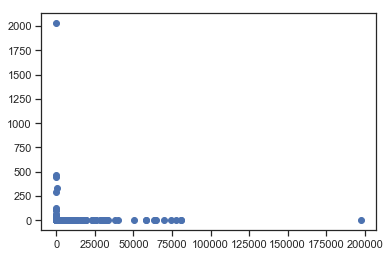

In [45]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()

#Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

#### Step 7.4.2 Zoom in so we can see that curve more clearly

[]

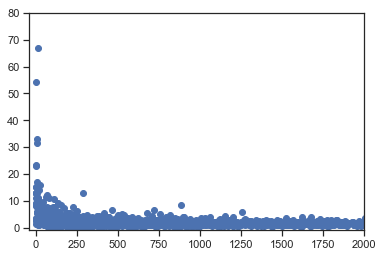

In [46]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)

#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()

#And there is still that pattern, this time in close-up!

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).
Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses. But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

### 8.1 Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue.

In [47]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval) #seq in r

#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

#### 8.3 Plot. 왜 8.2가 없는거지

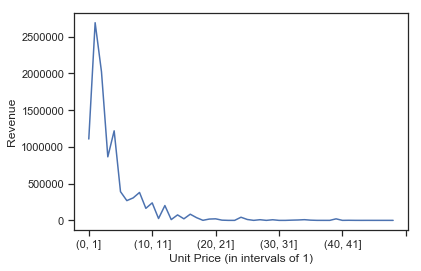

In [49]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.<br>
y-axis isn't that easy to read; show in terms of millions.

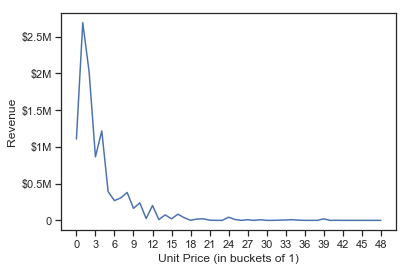

In [50]:
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

#Looks like a major chunk of our revenue comes from items worth $0-$3!

## Visualizing the Titanic Disaster(문제풀기)

### Step 1. Import the necessary libraries
### Step 2. Import the dataset from this address
### Step 3. Assign it to a variable titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

In [3]:
titanic=pd.read_csv("train.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 4. Set PassengerId as the index

In [5]:
titanic.set_index('PassengerId', inplace=True)

In [7]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [ ]:
plt.pie(titanic.Sex, labels=['female', 'male'], autopct='%1.1f%%', shadow=True)

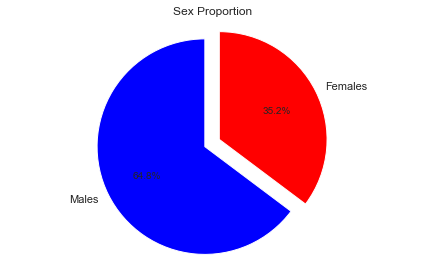

In [27]:
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

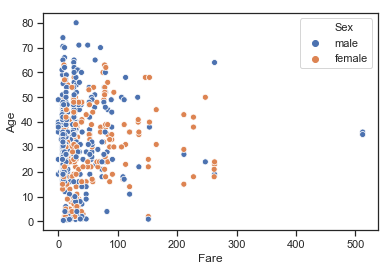

In [22]:
sns.scatterplot(x='Fare', y='Age', data=titanic, hue='Sex')

(-5, 85)

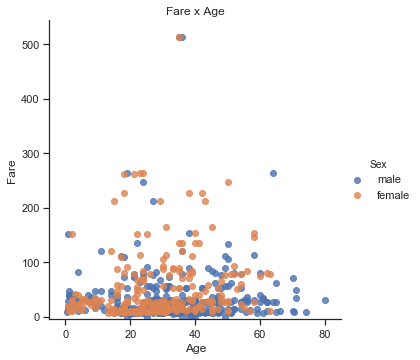

In [28]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### Step 7. How many people survived?

In [25]:
titanic.Survived.sum()
# 유감...

342

### Step 8. Create a histogram with the Fare payed

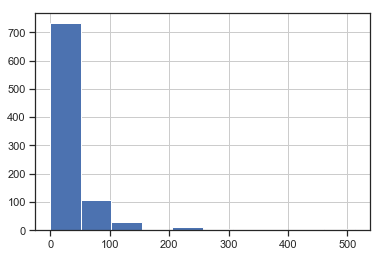

In [26]:
titanic.Fare.hist()

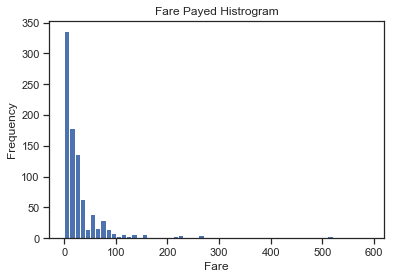

In [29]:
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()